In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
import plotly.graph_objs as go

In [2]:
pokedata=pd.read_csv('Pokemon_all.csv')

In [3]:
pokedata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokedata.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
881,803,Poipole,poison,NaN,420,67,73,67,73,67,73,7,False
882,804,Naganadel,poison,dragon,540,73,73,73,127,73,121,7,False
883,805,Stakataka,rock,steel,570,61,131,211,53,101,13,7,False
884,806,Blachepalon,fire,ghost,570,53,127,53,151,79,107,7,False
885,807,Zeraora,electric,NaN,600,88,112,75,102,80,143,7,True


In [5]:
pokedata.columns=pokedata.columns.str.upper()
pokedata.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
pokedata['TYPE 1']=pokedata['TYPE 1'].str.capitalize()

In [7]:
pokedata['TYPE 2']=pokedata['TYPE 2'].str.capitalize()

The above codes help to capitalize the first alphabet of each word

In [8]:
pokedata.drop_duplicates('#',keep='first',inplace=True)


In [9]:
pokedata.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [10]:
pokedata['TYPE 2'].fillna(value='None',inplace=True)
pokedata.tail()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
881,803,Poipole,Poison,None,420,67,73,67,73,67,73,7,False
882,804,Naganadel,Poison,Dragon,540,73,73,73,127,73,121,7,False
883,805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,False
884,806,Blachepalon,Fire,Ghost,570,53,127,53,151,79,107,7,False
885,807,Zeraora,Electric,None,600,88,112,75,102,80,143,7,True


In [11]:
print('Total number of pokemon in the data: {}'.format(pokedata['#'].count()))

Total number of pokemon in the data: 807


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 1, 'Count of pokemon in the various generations')

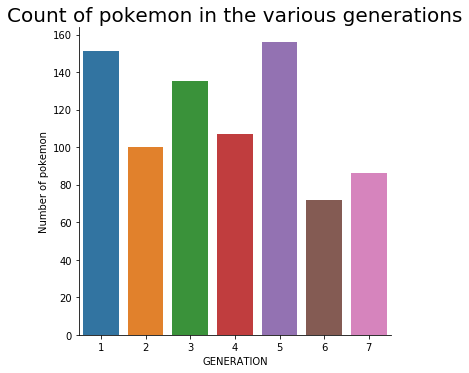

In [12]:
sns.factorplot('GENERATION',kind='count',data=pokedata)
plt.ylabel('Number of pokemon')
plt.title('Count of pokemon in the various generations',size=20)

From the above data, it can be said that the gen 5 pokemon are the highest by population followed closely by gen 1

Text(0.5, 1, 'Population of legendary pokemon')

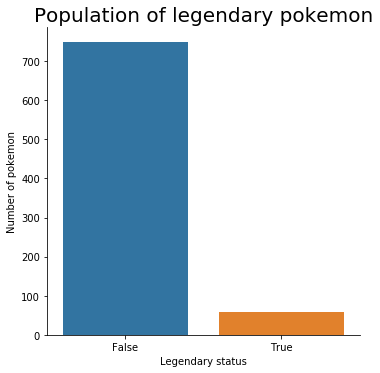

In [13]:
sns.factorplot('LEGENDARY',data=pokedata,kind='count')
plt.xlabel('Legendary status')
plt.ylabel('Number of pokemon')
plt.title('Population of legendary pokemon',size=20)

It can be clearly seen that the number of legendary pokemon are far lower (about 50) than the non legendary ones.

In [14]:
pokeLeg=pokedata[pokedata['LEGENDARY']==True]
pokeNon=pokedata[pokedata['LEGENDARY']==False]

([<matplotlib.patches.Wedge at 0x1153ef9d0>,
 [Text(-0.24626379885311644, 1.0720793540472795, 'Legendary'),
  Text(0.3582019987412368, -1.5593881261885327, 'Non Legendary')],
 [Text(-0.13432570846533623, 0.5847705567530614, '7.2%'),
  Text(0.24626387413460027, -1.0720793367546162, '92.8%')])

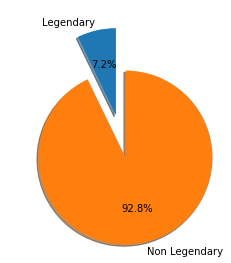

In [15]:
num=[pokeLeg.NAME.count(),pokeNon.NAME.count()]
labels=['Legendary','Non Legendary']

plt.pie(num,autopct='%1.1f%%',labels=labels,shadow=True,explode=(0,0.5),startangle=90)


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Text(10.313888888888897, 0.5, 'Number of pokemon')

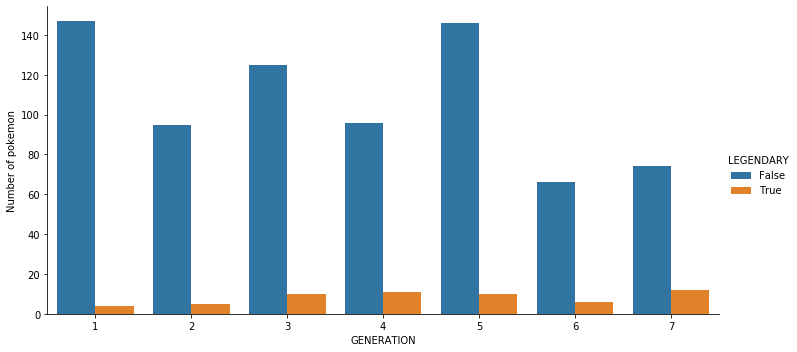

In [16]:
sns.factorplot('GENERATION',data=pokedata,kind='count',hue='LEGENDARY',size=5,aspect=2,legend=True)
plt.ylabel('Number of pokemon')

The above shows the number of legendary and non legendary pokemon of each gen.

Text(-18.200000000000003, 0.5, 'Number of pokemon')

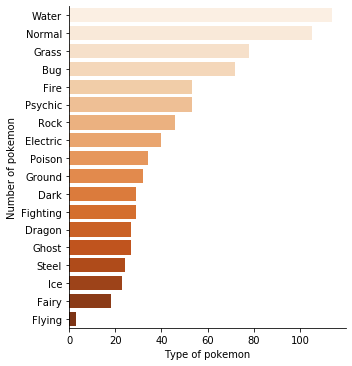

In [17]:
sns.factorplot(y='TYPE 1',data=pokedata,order=pokedata['TYPE 1'].value_counts().index,kind='count',size=5,aspect=1,palette='Oranges')


plt.xlabel('Type of pokemon')
plt.ylabel('Number of pokemon')

Text(-18.200000000000003, 0.5, 'Number of pokemon')

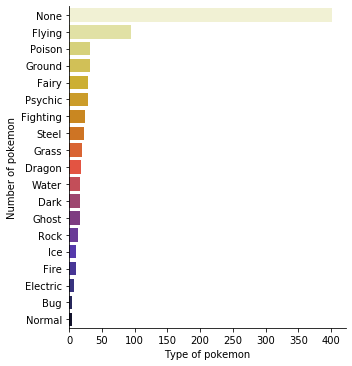

In [18]:
sns.factorplot(y='TYPE 2',data=pokedata,order=pokedata['TYPE 2'].value_counts().index,kind='count',size=5,aspect=1,palette='CMRmap_r')


plt.xlabel('Type of pokemon')
plt.ylabel('Number of pokemon')

This plot shows that most of the pokemon don't have a type 2 transformation.

In [19]:
pokedata.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [20]:
#pokedata.groupby(['TYPE 1', 'TYPE 2']).size()

In [21]:
p1=pokedata.groupby(['TYPE 1','TYPE 2']).count().unstack()

In [22]:
p1

#                                                              \
TYPE 2    Bug Dark Dragon Electric Fairy Fighting Fire Flying Ghost Grass   
TYPE 1                                                                      
Bug       NaN  NaN    NaN      4.0   2.0      3.0  2.0   13.0   1.0   6.0   
Dark      NaN  NaN    4.0      NaN   NaN      2.0  2.0    5.0   1.0   NaN   
Dragon    NaN  NaN    NaN      1.0   NaN      2.0  1.0    4.0   NaN   NaN   
Electric  NaN  NaN    NaN      NaN   2.0      NaN  NaN    3.0   1.0   NaN   
Fairy     NaN  NaN    NaN      NaN   NaN      NaN  NaN    2.0   NaN   NaN   
Fighting  NaN  1.0    NaN      NaN   NaN      NaN  NaN    1.0   1.0   NaN   
Fire      NaN  1.0    1.0      NaN   NaN      6.0  NaN    6.0   1.0   NaN   
Flying    NaN  NaN    2.0      NaN   NaN      NaN  NaN    NaN   NaN   NaN   
Ghost     NaN  1.0    1.0      NaN   1.0      NaN  3.0    2.0   NaN   5.0   
Grass     NaN  3.0    NaN      NaN   5.0      3.0  NaN    6.0   1.0   NaN   
Ground    NaN  3.0    2.0      1.0   NaN      NaN  NaN    3.0   2.0   NaN   
Ice       NaN  NaN    NaN      NaN   NaN      NaN  NaN    2.0   1.0   NaN   
Normal    NaN  NaN    1.0      NaN   4.0      2.0  NaN   26.0   NaN   2.0   
Poison    1.0  3.0    2.0      NaN   NaN      2.0  2.0    3.0   NaN   NaN   
Psychic   NaN  NaN    NaN      NaN   6.0      1.0  1.0    6.0   2.0   1.0   
Rock      2.0  1.0    2.0      NaN   2.0      1.0  NaN    4.0   NaN   2.0   
Steel     NaN  NaN    1.0      NaN   3.0      1.0  NaN    2.0   3.0   NaN   
Water     2.0  4.0    2.0      2.0   4.0      2.0  NaN    7.0   2.0   3.0   

          ... LEGENDARY                                                     \
TYPE 2    ...     Grass Ground  Ice  None Normal Poison Psychic Rock Steel   
TYPE 1    ...                                                                
Bug       ...       6.0    1.0  NaN  18.0    NaN   11.0     NaN  3.0   5.0   
Dark      ...       NaN    NaN  2.0   9.0    NaN    NaN     2.0  NaN   2.0   
Dragon    ...       NaN    4.0  1.0  12.0    NaN    NaN     2.0  NaN   NaN   
Electric  ...       NaN    NaN  NaN  28.0    2.0    NaN     NaN  NaN   4.0   
Fairy     ...       NaN    NaN  NaN  16.0    NaN    NaN     NaN  NaN   NaN   
Fighting  ...       NaN    NaN  1.0  22.0    NaN    NaN     2.0  NaN   1.0   
Fire      ...       NaN    2.0  NaN  30.0    2.0    NaN     1.0  1.0   1.0   
Flying    ...       NaN    NaN  NaN   1.0    NaN    NaN     NaN  NaN   NaN   
Ghost     ...       5.0    2.0  NaN   9.0    NaN    3.0     NaN  NaN   NaN   
Grass     ...       NaN    1.0  2.0  38.0    NaN   14.0     2.0  NaN   3.0   
Ground    ...       NaN    NaN  NaN  15.0    NaN    NaN     2.0  3.0   1.0   
Ice       ...       NaN    3.0  NaN  12.0    NaN    NaN     2.0  NaN   NaN   
Normal    ...       2.0    1.0  NaN  65.0    NaN    NaN     3.0  NaN   NaN   
Poison    ...       NaN    2.0  NaN  16.0    NaN    NaN     NaN  NaN   NaN   
Psychic   ...       1.0    NaN  NaN  35.0    NaN    NaN     NaN  NaN   1.0   
Rock      ...       2.0    6.0  2.0  11.0    NaN    1.0     2.0  NaN   4.0   
Steel     ...       NaN    1.0  NaN   4.0    NaN    NaN     6.0  3.0   NaN   
Water     ...       3.0    9.0  3.0  61.0    NaN    3.0     5.0  4.0   1.0   

                
TYPE 2   Water  
TYPE 1          
Bug        3.0  
Dark       NaN  
Dragon     NaN  
Electric   NaN  
Fairy      NaN  
Fighting   NaN  
Fire       1.0  
Flying     NaN  
Ghost      NaN  
Grass      NaN  
Ground     NaN  
Ice        3.0  
Normal     1.0  
Poison     3.0  
Psychic    NaN  
Rock       6.0  
Steel      NaN  
Water      NaN  

[18 rows x 209 columns]

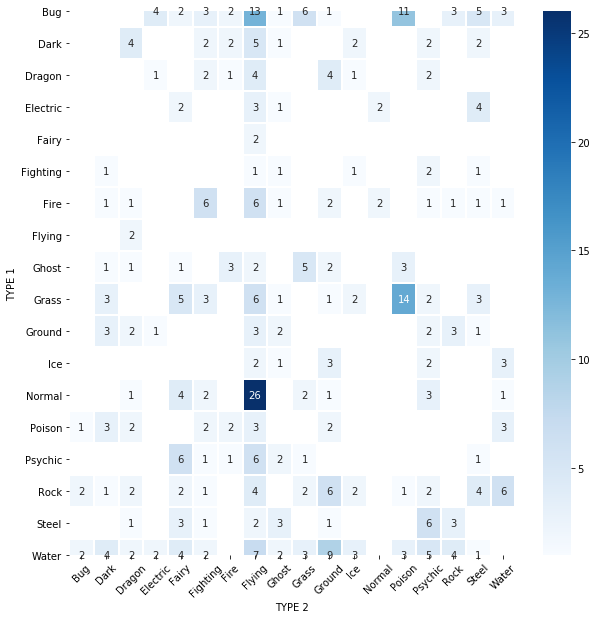

In [23]:
plt.subplots(figsize=(10, 10))
sns.heatmap(
    pokedata[pokedata['TYPE 2']!='None'].groupby(['TYPE 1', 'TYPE 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=45)
plt.show()

In [24]:

pokemon=pd.read_csv('pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [25]:
pokemon.columns=pokemon.columns.str.upper()

In [26]:
pokemon.head()

,ABILITIES,AGAINST_BUG,AGAINST_DARK,AGAINST_DRAGON,AGAINST_ELECTRIC,AGAINST_FAIRY,AGAINST_FIGHT,AGAINST_FIRE,AGAINST_FLYING,AGAINST_GHOST,...,PERCENTAGE_MALE,POKEDEX_NUMBER,SP_ATTACK,SP_DEFENSE,SPEED,TYPE1,TYPE2,WEIGHT_KG,GENERATION,IS_LEGENDARY
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Text(0, 0.5, 'Number of pokemon')

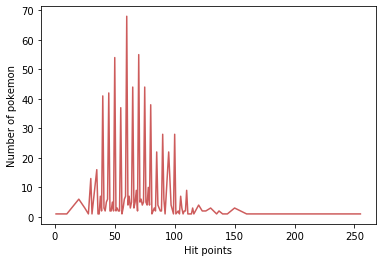

In [27]:
plt.plot(pokemon.HP.value_counts().sort_index(),color='indianred')
plt.xlabel('Hit points')
plt.ylabel('Number of pokemon')

In [28]:
pokemon.HP.value_counts().sort_index()

1      1
10     1
20     6
25     3
28     1
      ..
190    1
216    1
223    1
250    1
255    1
Name: HP, Length: 99, dtype: int64

Text(0, 0.5, 'Number of pokemon')

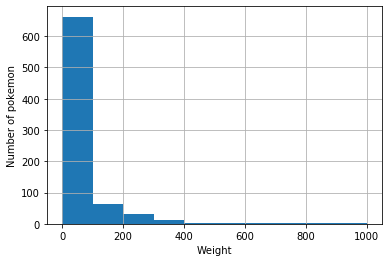

In [29]:
pokemon.WEIGHT_KG.hist()
plt.xlabel('Weight')
plt.ylabel('Number of pokemon')

Text(0, 0.5, 'Attack')

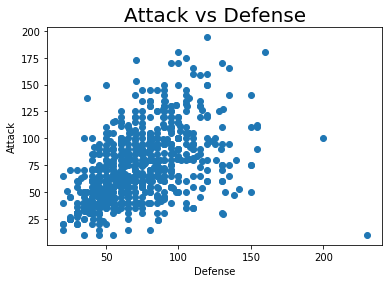

In [30]:
plt.scatter(pokemon['SP_DEFENSE'],pokemon['SP_ATTACK'])
plt.title('Attack vs Defense',size=20)
plt.xlabel('Defense')
plt.ylabel('Attack')

Text(0, 0.5, 'Attack')

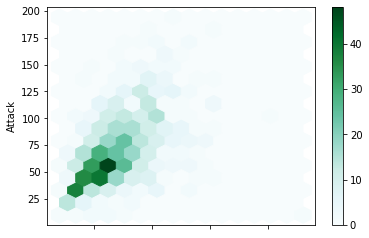

In [33]:
pokemon.plot.hexbin(x='SP_DEFENSE',y='SP_ATTACK',gridsize=15)
plt.xlabel('Defense')
plt.ylabel('Attack')

Text(0.5, 1.0, 'Speed distribution of pokemon')

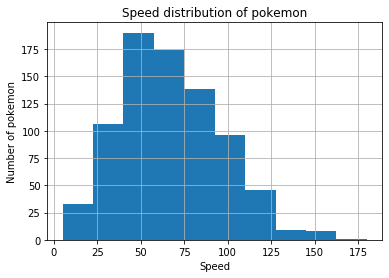

In [35]:
pokemon.SPEED.hist()
plt.xlabel('Speed')
plt.ylabel('Number of pokemon')
plt.title('Speed distribution of pokemon')

As we can see, speed is almost normally distributed here.

Text(0.5, 1.0, 'Defense frequency')

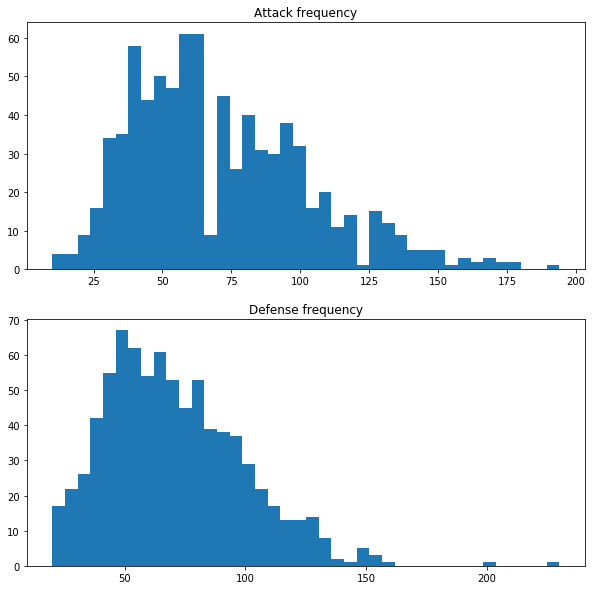

In [54]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))
ax1.hist(x=pokemon['SP_ATTACK'],bins=40)
ax1.set_title('Attack frequency')
ax2.hist(x=pokemon['SP_DEFENSE'],bins=40)
ax2.set_title('Defense frequency')

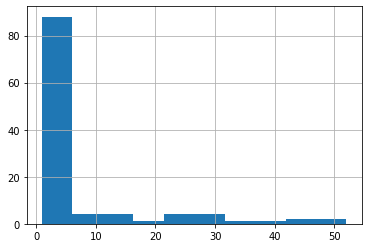

In [63]:
pokemon['SP_ATTACK'].value_counts().sort_index().hist()

From the above histogram, it can be seen that maximum pokemon have an attack rating of 0-10

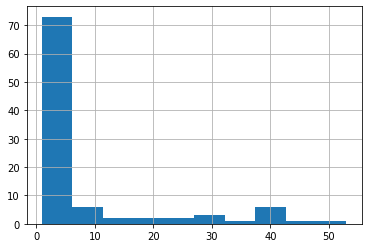

In [64]:
pokemon['SP_DEFENSE'].value_counts().sort_index().hist()

Just like attack, in the defense numbers aswell, the maximum pokemon have a rating between 0-10

Text(0, 0.5, 'Number of pokemon')

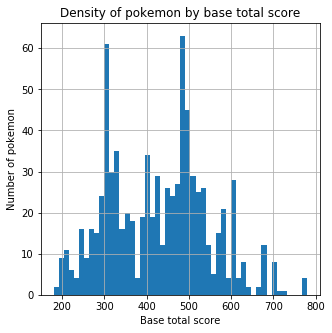

In [75]:
pokemon.BASE_TOTAL.hist(bins=50,figsize=(5,5))
plt.title('Density of pokemon by base total score')
plt.xlabel('Base total score')
plt.ylabel('Number of pokemon')

In the base total historgram, it can be seen that pokemon with 300 and 500 scores are higher than others.

Scores above 600 and below 200 are negligible

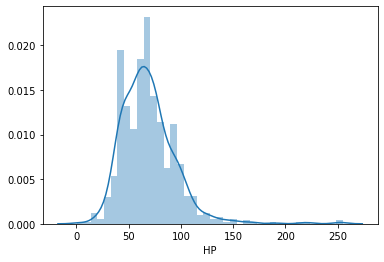

In [77]:
sns.distplot(pokemon['HP'])

Text(0, 0.5, 'Attack score')

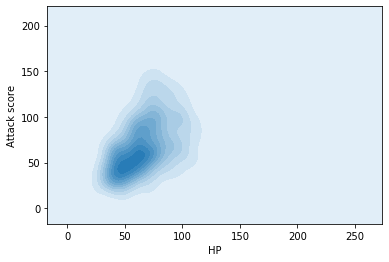

In [83]:
sns.kdeplot(pokemon['HP'],pokemon['SP_ATTACK'],shade=True)
plt.ylabel('Attack score')

Text(0, 0.5, 'Attack scores')

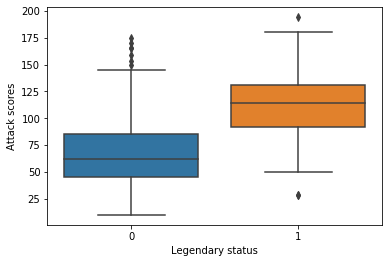

In [89]:

sns.boxplot(pokemon['IS_LEGENDARY'],pokemon['SP_ATTACK'])
plt.xlabel('Legendary status')
plt.ylabel('Attack scores')

Text(0, 0.5, 'Defense scores')

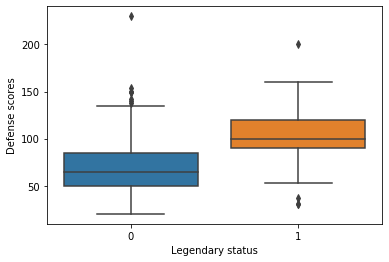

In [91]:
sns.boxplot(pokemon['IS_LEGENDARY'],pokemon['SP_DEFENSE'])
plt.xlabel('Legendary status')
plt.ylabel('Defense scores')

As it can be seen, the median defense as well as attack scores are higher for legendary pokemon. The 25 and 75 quartile values are significantly higher too.

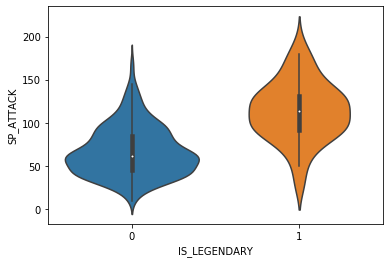

In [93]:
sns.violinplot(x=pokemon.IS_LEGENDARY, y=pokemon.SP_ATTACK)

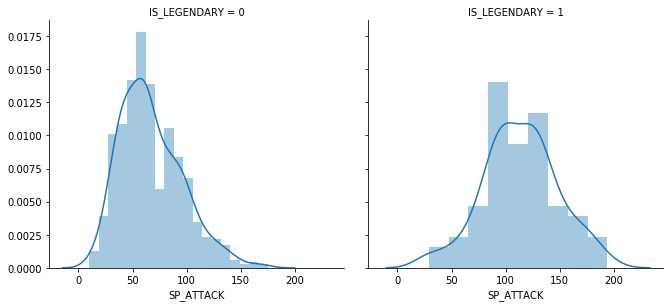

In [143]:

grid=sns.FacetGrid(pokemon,col='IS_LEGENDARY')

grid.map(sns.distplot,'SP_ATTACK')

#Below are the commands to change the width and height of seaborn plots.
grid.fig.set_figwidth(10)
grid.fig.set_figheight(5)

As it can be seen from the distribution plot, most of the legendary pokemon have an attack score between 100-125. For the non legendary ones, the scores are below 100.

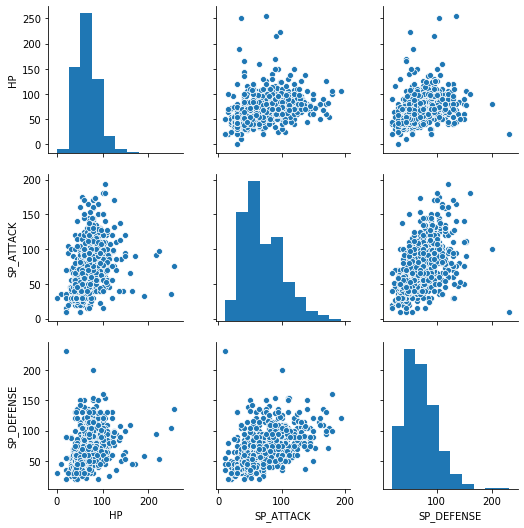

In [144]:
sns.pairplot(pokemon[['HP', 'SP_ATTACK', 'SP_DEFENSE']])

The scatters are extremely random and it is difficult to find any type of correlation with each other.

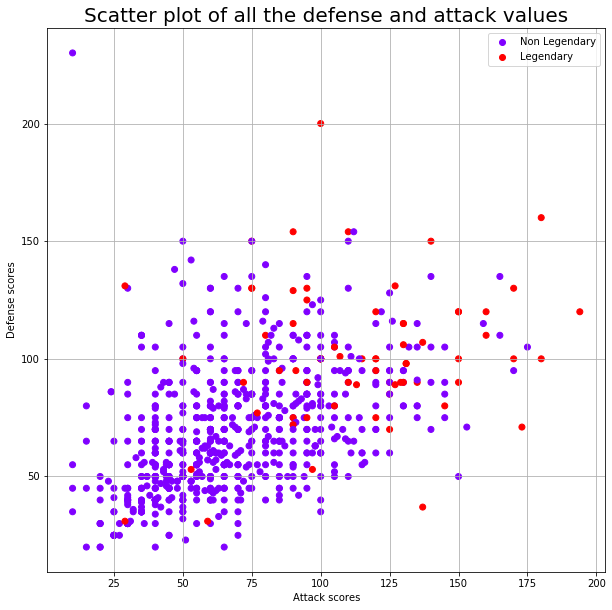

In [197]:
plt.figure(figsize=(10,10))
legends=pokemon.IS_LEGENDARY.unique()


scatter=plt.scatter(pokemon['SP_ATTACK'],pokemon['SP_DEFENSE'],
            c=pokemon['IS_LEGENDARY'],cmap='rainbow',
            marker='o')

#Code below is to add a legends tab in plt.scatter
plt.legend(handles=scatter.legend_elements()[0],labels=['Non Legendary','Legendary'])
plt.grid(True)
plt.title('Scatter plot of all the defense and attack values',size=20)
plt.xlabel('Attack scores')
plt.ylabel('Defense scores')
plt.show()

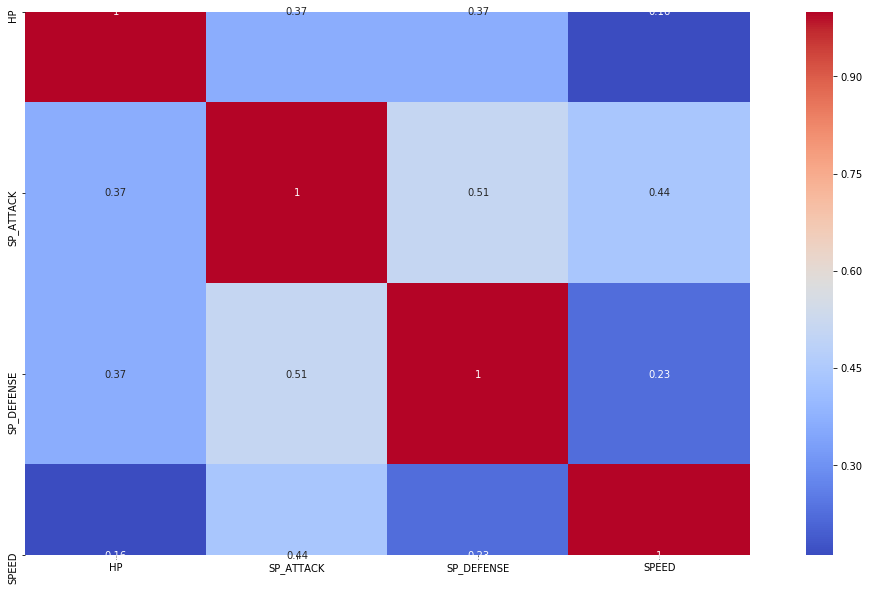

In [208]:
plt.rcParams['figure.figsize'] = (20, 10)
grid=sns.heatmap(pokemon.loc[:,['HP','SP_ATTACK','SP_DEFENSE','SPEED']].corr(),annot=True,cmap='coolwarm',square=True)

From the above correlation plot, it is difficult to see much correlation among any of the factors. Attack and Defence have somewhat average correlation. Speed and attack also seem to be correlated a little.